### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, inside the previously used Molecular Dynamics code</span>.

Il programma scritto per svolgere l'esercizio 4.4 è stato modificato in modo che ogni volta che viene richiamata la funzione *Measure()* venga misurata anche la g(r) della configurazione raggiunta. Ciascuna minsura di g(r) è composta da un vettore di 30 caselle pari al numero di bin che compongono l'istogramma della distribuzione radiale, le componenti di questo vettore vengono salvate di volta in volta nel file *output_gofr.dat*.

Una volta terminata la simulazione viene eseguito il datablocking delle misure istantanee della g(r) dalla funzione *DatablockingGofr* definita nel file *datablockingspecial.cpp*. Essa raggruppa le misure istantanee in una matrice di *Block_Number* righe pari al numero di blocchi in cui si vogliono suddividere le *Dati_number* misure fatte e di *Bin_Number* colonne pari al numero di bin utilizzati per calcoare g(r). 
Le colonne di questa matrice sono poi utilizzate per calcolare il databloching di ciascun bin.

Di seguito riportiamo i grafici ottenuti simulando un gas ($\rho^\star = 0.05$, $T^\star = 1.2$ cut-off radius: $r_c = 5.0$). Il sistema è stato equilibrato perchè parta da una configurazione avente la temperatura deiderata, i dati riportati provengono da una simulazione di 1000 step temporali, misurando ogni 10 step e raccogliendo le 100 misure istantanee ottenute in 10 blocchi da 10 misure l'una.
Il primo script di python stampa la g(r) media di ciascun blocco:

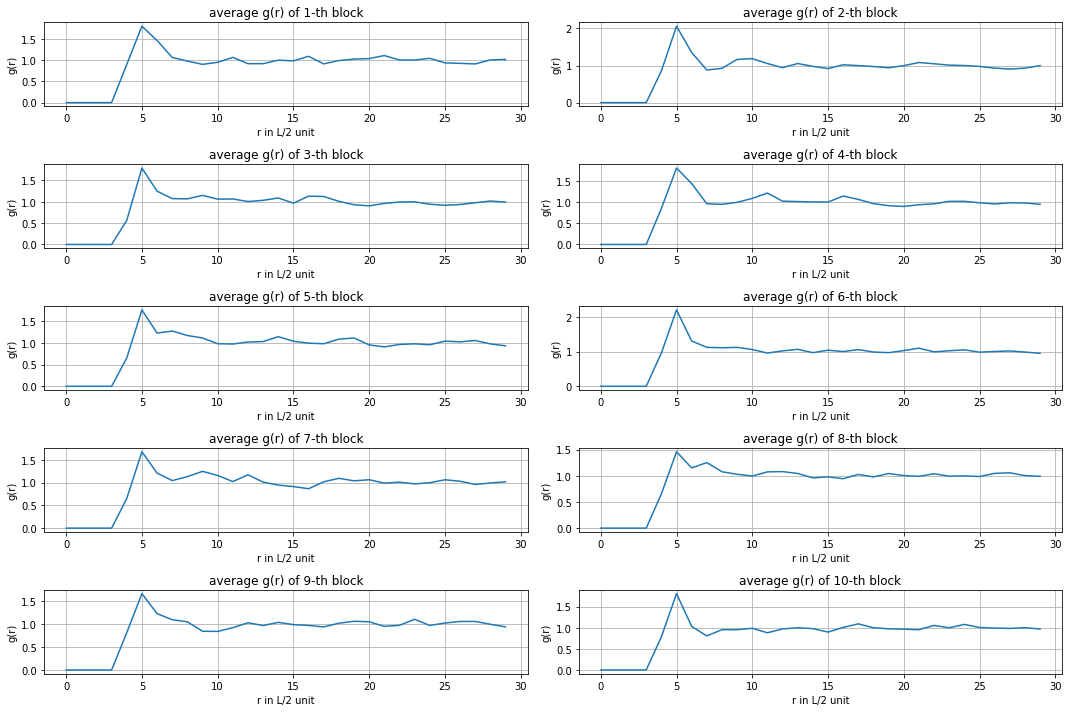

In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15, 10))

nblk=10
data = np.loadtxt('./code/risultati/ave_block_gofr.dat')
for i in range (nblk):
    plt.subplot(5,2,i+1)
    plt.plot(np.arange(30),data[i])
    plt.xlabel("r in L/2 unit")
    plt.ylabel("g(r)")
    plt.title("average g(r) of "+str(i+1)+"-th block")
    plt.grid()
plt.tight_layout() 
plt.show()

Il secondo la g(r) ottenuta dal datablocking su tutti i blocchi:

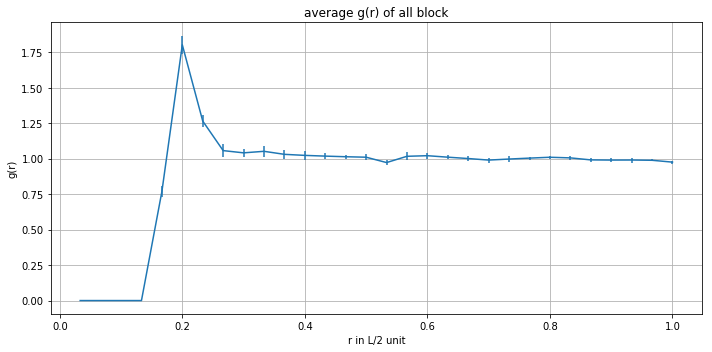

In [22]:
fig=plt.figure(figsize=(10, 5))
nbin=30
data = np.loadtxt('./code/risultati/ave_gofr.dat')
datalist = np.split(data,nbin)
gofr= np.zeros(nbin)
error= np.zeros(nbin)
for i in range (nbin):
    gofr[i]=datalist[i][9][2]
    error[i]=datalist[i][9][3]

plt.errorbar(np.arange(1./nbin, 1.+1./nbin, 1./nbin),gofr, yerr=error)
plt.xlabel("r in L/2 unit")
plt.ylabel("g(r)")
plt.title("average g(r) of all block")
plt.grid()
plt.tight_layout()
plt.show()

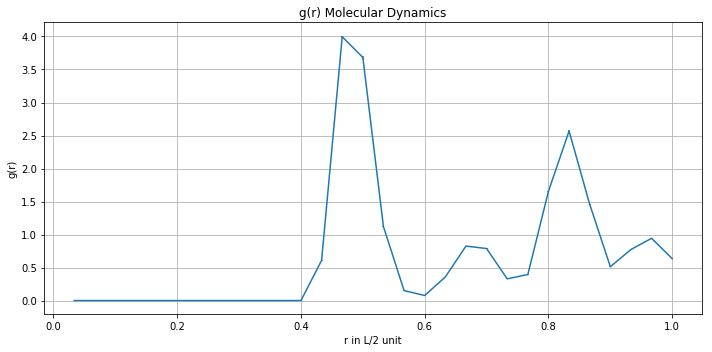

In [27]:
fig=plt.figure(figsize=(10, 5))
nbin=30
data = np.loadtxt('./code/risultati/ave_gofr.dat')
datalist = np.split(data,nbin)
gofr= np.zeros(nbin)
error= np.zeros(nbin)
for i in range (nbin):
    gofr[i]=datalist[i][9][2]
    error[i]=datalist[i][9][3]

plt.errorbar(np.arange(1./nbin, 1.+1./nbin, 1./nbin),gofr, yerr=error)
plt.xlabel("r in L/2 unit")
plt.ylabel("g(r)")
plt.title("g(r) Molecular Dynamics")
plt.grid()
plt.tight_layout()
plt.savefig("../Exercise7.4/pictures/MDy_solid_gofr.png")
plt.show()

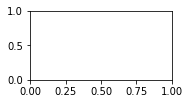

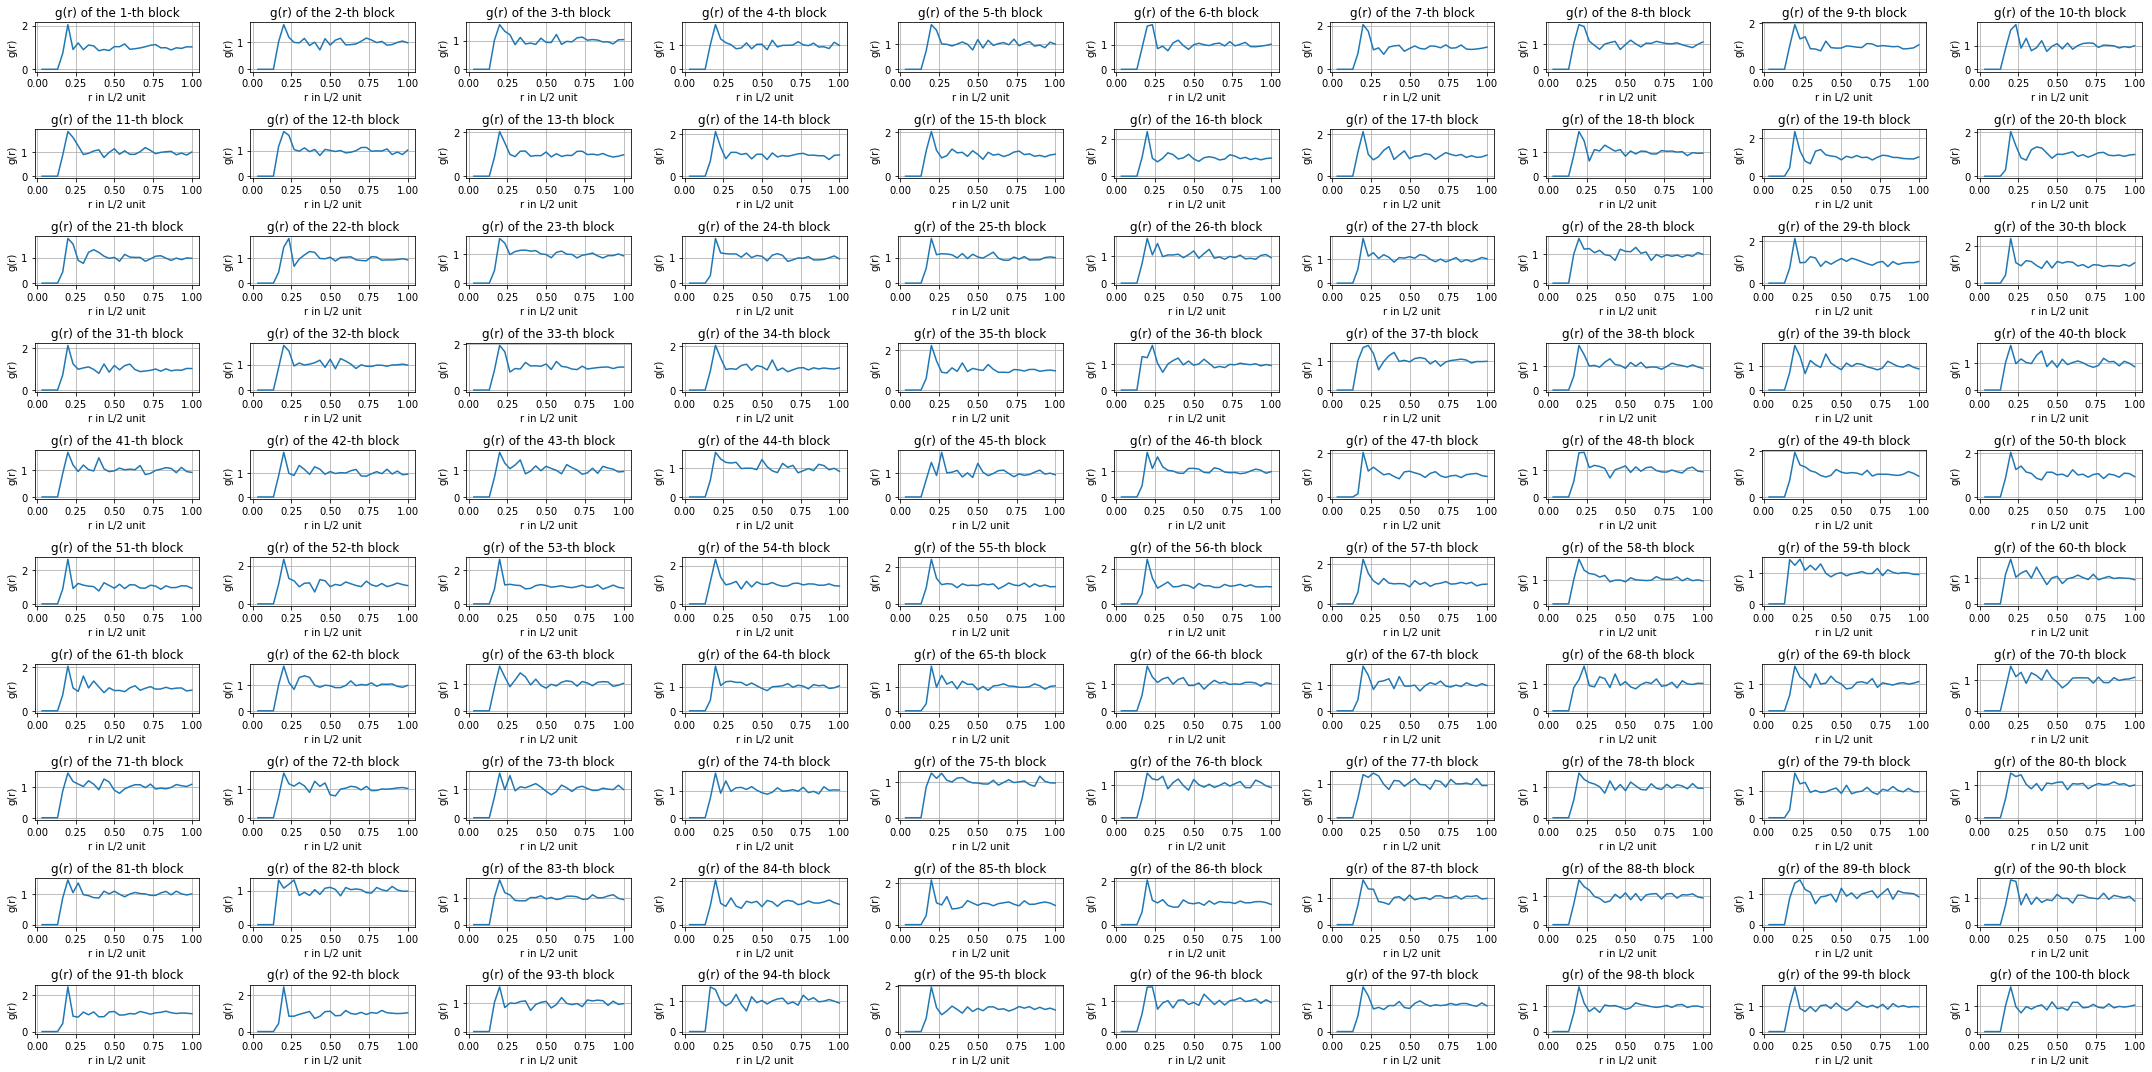

In [26]:
fig=plt.figure(figsize=(30, 15))

nblk=100

data = np.loadtxt('./code/risultati/output_gofr.dat')
datalist = np.split(data,nblk)
for i in range(len(datalist)):
    plt.subplot(10,10,i+1)
    plt.plot(np.arange(1./len(datalist[1]),1.+1./len(datalist[1]),1./len(datalist[1])),datalist [i])
    plt.xlabel("r in L/2 unit")
    plt.ylabel("g(r)")
    plt.title("g(r) of the "+str(i+1)+"-th block")
    plt.grid()
plt.tight_layout()
plt.show()